## Сегментация изображений

In [ ]:
import torch
from torch import nn
from torch import optim

import numpy as np

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda



### Fully Convolutional Network

Одна из самых простых архитектур - это [FCN](https://towardsdatascience.com/review-fcn-semantic-segmentation-eb8c9b50d2d1) (Fully Convolutional Network). Это первая удачная попытка использования нейронной сети для задачи семантической сегментации. В этой архитектуре все слои сверточные. На выходе используется как правило один деконволюционный слой.
Одна из основных проблем - это низкое разрешение на выходе.

<img src='https://drive.google.com/uc?export=view&id=1-XxAqreNk-5p7Ak5sl4oIeCuaJ_x6OH2' width=500>


<ipython-input-5-45fb2ebeca7c>:5: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  img = misc.face()


(14, 14, 3)


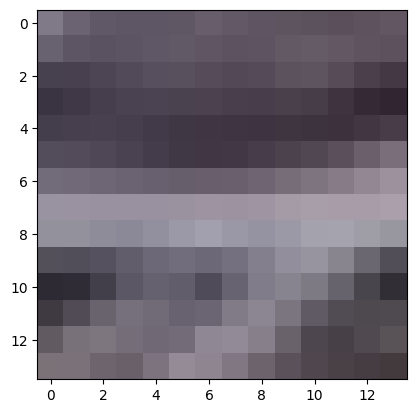

In [ ]:
from scipy import misc
import matplotlib.pyplot as plt


img = misc.face()
img = img[40:54, 50:64]
print(img.shape)
plt.imshow(img);

In [ ]:
from torchvision.transforms import ToTensor

img_tensor = ToTensor()(img)
img_tensor.shape

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:154: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:206.)
  img = torch.from_numpy(pic.transpose((2, 0, 1))).contiguous()


torch.Size([3, 14, 14])

In [ ]:
upsamle = nn.Upsample(scale_factor=(16, 16),
                      mode='bilinear',
                    #   mode='nearest',
                      )
# upsamle.weight

torch.Size([3, 224, 224])


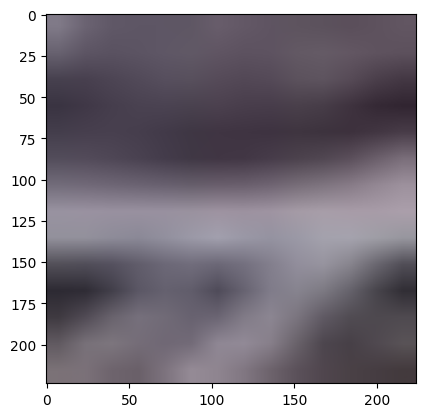

In [ ]:
upsamled_img = upsamle(img_tensor[None])[0]
print(upsamled_img.shape)
plt.imshow(upsamled_img.permute(1, 2, 0));

<table>
<tr>
<td><img src='https://drive.google.com/uc?export=view&id=10dBpbTIqysMVBeK-uw7-fjIaOaqGyivR' width=400>
</td>
<td>
<img src='https://drive.google.com/uc?export=view&id=1U9fe3rFasxK-kxwtWN_vOifynJgYEKPK' width=400>
</td>
</tr>
</table>

In [ ]:
conv = nn.ConvTranspose2d(in_channels=3,
                          out_channels=3,
                          stride=16,
                          kernel_size=16)
conv.weight.shape

torch.Size([3, 3, 16, 16])

torch.Size([3, 224, 224])


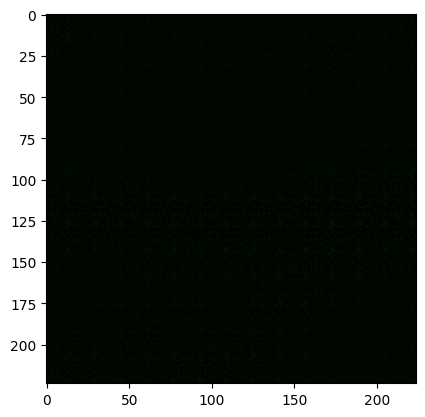

In [ ]:
conv_img = conv(img_tensor[None])[0].detach()
print(conv_img.shape)
plt.imshow(conv_img.permute(1, 2, 0));

### SegNet

SegNet появилась в 2015 г. Данная архитектура состоит из конволюционной и деконволюционной части.

Декодирующая часть в SegNet позволяет сделать более плавное разворачивание изображения после того как отработала сверточная часть архитектуры. Благодаря этому границы объектов на изображение определяются более корректно.

Стоит отметить, что в качестве сверточной части могут использоваться различные предтренерованные нейронные сети для решения задач классификации, например различные модификации VGG и ResNet.

<img src='https://drive.google.com/uc?export=view&id=1YRgQtgX90Y0YTuSRrDZfOr_qyEsVi6ax'>

### Unet

Когда мы изучаем задачу сегментацию, Unet - это одна из базовых и наиболее используемых моделей для сегментации

<img src='https://drive.google.com/uc?export=view&id=1XbOyrbDKRIBde-phT8i6ctdJdRXmtLxZ' width=600>



Особенность U-net - skip connection. Данные skip connections позволяют сигналу не только проходить строго, сначала по нисходящей лестницы слоев, а потом по восходящей лестнице апсемплинга, но и также перескакивать между слоями одного уровня, что в частности решает проблему дублирования функций слоев и улучшает эффективность обучения.

<img src='https://drive.google.com/uc?export=view&id=1f3za1M3fCTbmze4DZIi5FQWgdmxzZQ9I' width=400>

<img src='https://drive.google.com/uc?export=view&id=1QGUloAmSPCNW99MOfCjPQ4BERkrXLxCR'>

## Оценка качества


### Коэффициент DICE

* Dice может использоваться для попиксельного сравнения между предсказанной маской и истинной маской
* Dice - это площадь пересечения дважды, деленная на общее количество пикселей на двух картинках

<img src='https://www.researchgate.net/profile/Mohammad-Ryalat/publication/352647737/figure/fig1/AS:1037503469461510@1624371511602/Graphical-illustration-of-Dice-similarity-coefficient.ppm' width=200>

Формула подсчета:

<center> $ \huge \frac{2*|X∩Y|}{|X|+|Y|}$ </center>

<br>

где X - это предсказанное множество пикселей, а Y - истина.

### Intersection over Union

IoU - это мера величины перекрытия между двумя масками. Он вычисляет размер перекрытия между двумя объектами, деленный на общую площадь объединенных объектов.

<img src='https://drive.google.com/uc?export=view&id=1VcvjSTbx5JDZEpWzF-3bCeFFsAMVGyZS' width=500>


Формула подсчета:

<center> $ \huge \frac{|X∩Y|}{|X∪Y|}$ </center>

<br>

где X - это предсказанное множество пикселей, а Y - истина.

# Практическая часть

https://www.kaggle.com/julichitai/gb-segmentation-for-self-driving-cars-pytorch


#### 🧠 Упражнение

1. Необходимо подготовить датасет https://www.kaggle.com/olekslu/makeup-lips-segmentation-28k-samples для обучения модели на сегментацию губ
2. Обучить модель на выбор из [segmentation_models_pytorch](https://segmentation-modelspytorch.readthedocs.io/en/latest/index.html)


##### 🧠 Упражнение (ответ)


https://www.kaggle.com/code/julichitai/lips-segmentation-pytorch

## Дополнительные материалы

1. [DeepLabv3+ | Lecture 32 (Part 4) | Applied Deep Learning](https://youtu.be/Gzrej8ciK9o)
8. [Mask-RCNN](https://kharshit.github.io/blog/2019/08/23/quick-intro-to-instance-segmentation)
11. [Semantic Segmentation Benchmarks](https://paperswithcode.com/task/semantic-segmentation)

